In [1]:
import pandas as pd

In [13]:
df = pd.read_csv(r"E:\#Download\updated_pollution_dataset.csv")
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [3]:
df.dtypes

Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density                 int64
Air Quality                       object
dtype: object

In [4]:
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [6]:
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

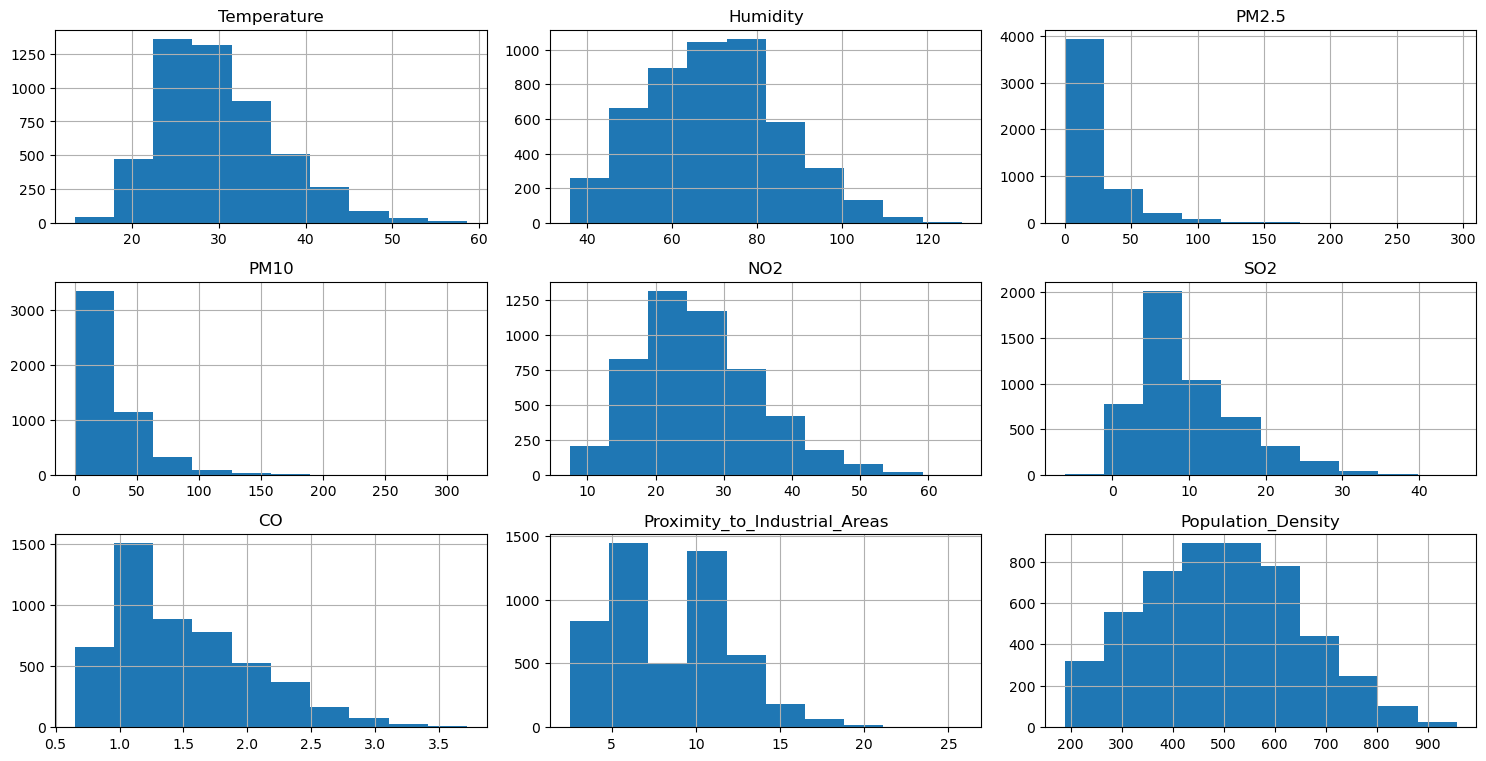

In [17]:
df.hist(bins=10, figsize=(15, 10), layout=(4, 3))
plt.tight_layout()
plt.show()


In [19]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df["Air Quality"]=enc.fit_transform(df["Air Quality"])
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,1
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,2
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,2
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,0


In [27]:
from sklearn. model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold ,cross_val_score
x= df.drop(columns=["Air Quality"])
y = df["Air Quality"]


In [28]:
lis = [ DecisionTreeClassifier,RandomForestClassifier, GradientBoostingClassifier]
for i in lis:
    print(i)
    model=i()
    k=KFold(n_splits=5,)
    print(cross_val_score(model,x,y,cv=k,).mean())

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
0.925
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
0.9544
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
0.9536


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)
model = RandomForestClassifier()

In [31]:
from sklearn.model_selection import RandomizedSearchCV
param={"n_estimators":[100,200,300],"max_depth":[4,5,6],"random_state":[10,20,30]}
random = RandomizedSearchCV(estimator=model,param_distributions=param,cv=k,n_iter=20,verbose=2)

In [32]:
random.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .....max_depth=4, n_estimators=200, random_state=10; total time=   0.9s
[CV] END .....max_depth=4, n_estimators=200, random_state=10; total time=   0.9s
[CV] END .....max_depth=4, n_estimators=200, random_state=10; total time=   1.0s
[CV] END .....max_depth=4, n_estimators=200, random_state=10; total time=   0.8s
[CV] END .....max_depth=4, n_estimators=200, random_state=10; total time=   0.8s
[CV] END .....max_depth=6, n_estimators=200, random_state=10; total time=   1.1s
[CV] END .....max_depth=6, n_estimators=200, random_state=10; total time=   1.1s
[CV] END .....max_depth=6, n_estimators=200, random_state=10; total time=   1.1s
[CV] END .....max_depth=6, n_estimators=200, random_state=10; total time=   1.1s
[CV] END .....max_depth=6, n_estimators=200, random_state=10; total time=   1.1s
[CV] END .....max_depth=6, n_estimators=300, random_state=20; total time=   1.8s
[CV] END .....max_depth=6, n_estimators=300, ra

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [4, 5, 6],
                                        'n_estimators': [100, 200, 300],
                                        'random_state': [10, 20, 30]},
                   verbose=2)

In [33]:
random.best_estimator_

RandomForestClassifier(max_depth=6, n_estimators=300, random_state=30)

In [34]:
best_model=random.best_estimator_
best_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=300, random_state=30)

In [36]:
print(best_model.predict(x_test))
# print(best_model.predict())

array([3, 2, 2, 2, 0, 2, 3, 0, 0, 2, 0, 2, 2, 0, 3, 3, 3, 2, 2, 0, 3, 2,
       2, 3, 2, 3, 2, 2, 0, 0, 0, 0, 2, 0, 2, 3, 0, 3, 3, 2, 0, 3, 2, 0,
       2, 0, 0, 3, 2, 1, 0, 0, 2, 0, 2, 0, 2, 0, 2, 3, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0, 3, 0, 0, 1, 2, 0, 3, 2, 2,
       0, 0, 2, 3, 0, 0, 3, 3, 0, 0, 2, 3, 0, 0, 3, 2, 0, 0, 2, 0, 2, 2,
       2, 0, 3, 3, 1, 0, 3, 0, 1, 3, 0, 2, 1, 0, 0, 3, 3, 0, 0, 0, 3, 2,
       0, 2, 0, 3, 2, 0, 3, 3, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 3, 2, 2, 0,
       1, 0, 0, 2, 3, 2, 3, 0, 0, 2, 0, 0, 1, 1, 0, 0, 3, 0, 0, 3, 0, 1,
       0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2, 2, 3, 0, 2, 2,
       0, 1, 2, 1, 3, 0, 0, 2, 2, 3, 0, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1,
       0, 3, 0, 3, 2, 3, 0, 0, 0, 0, 2, 3, 0, 3, 0, 1, 2, 3, 2, 0, 3, 2,
       2, 3, 0, 2, 0, 3, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 3,
       2, 3, 3, 0, 3, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2,
       0, 1, 0, 2, 2, 3, 0, 3, 0, 2, 2, 0, 0, 2, 2,

In [38]:
print(best_model.score(x_train,y_train))
print(best_model.score(x_test,y_test))

0.9625
0.937


In [40]:
from sklearn.metrics import classification_report, accuracy_score

# Print classification report and accuracy
print(classification_report(y_test, best_model.predict(x_test)))
print("Accuracy:", accuracy_score(y_test, best_model.predict(x_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       0.90      0.74      0.81       106
           2       0.95      0.96      0.96       295
           3       0.80      0.88      0.84       188

    accuracy                           0.94      1000
   macro avg       0.91      0.89      0.90      1000
weighted avg       0.94      0.94      0.94      1000

Accuracy: 0.937


In [41]:
best_model.feature_importances_

array([0.05192976, 0.01953318, 0.0025093 , 0.01305332, 0.09487519,
       0.09099492, 0.40322778, 0.30008879, 0.02378777])

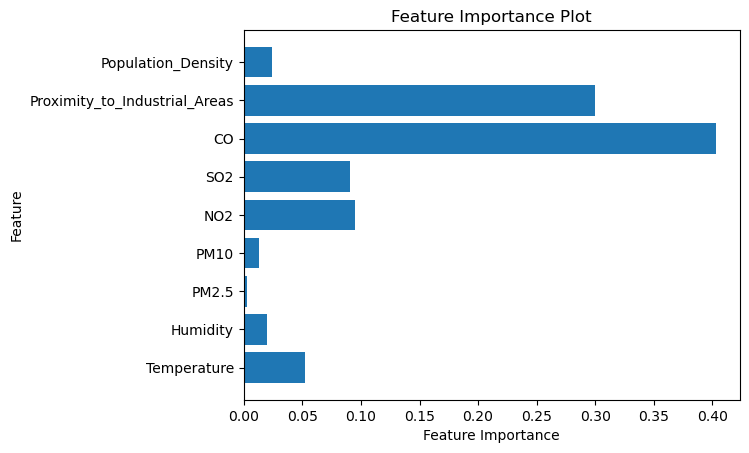

In [46]:
import matplotlib.pyplot as plt

# Feature importance for tree-based models
(best_model, 'feature_importances_')
importance = best_model.feature_importances_
plt.barh(x_train.columns, importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()


In [44]:
import joblib

# Save the model to a file
joblib.dump(best_model, 'Pollution_pred_RF.pkl')


['Pollution_pred_RF.pkl']

# model has 95% accuracy so no scaling is nessesary!

#### Now load the data to check outliers

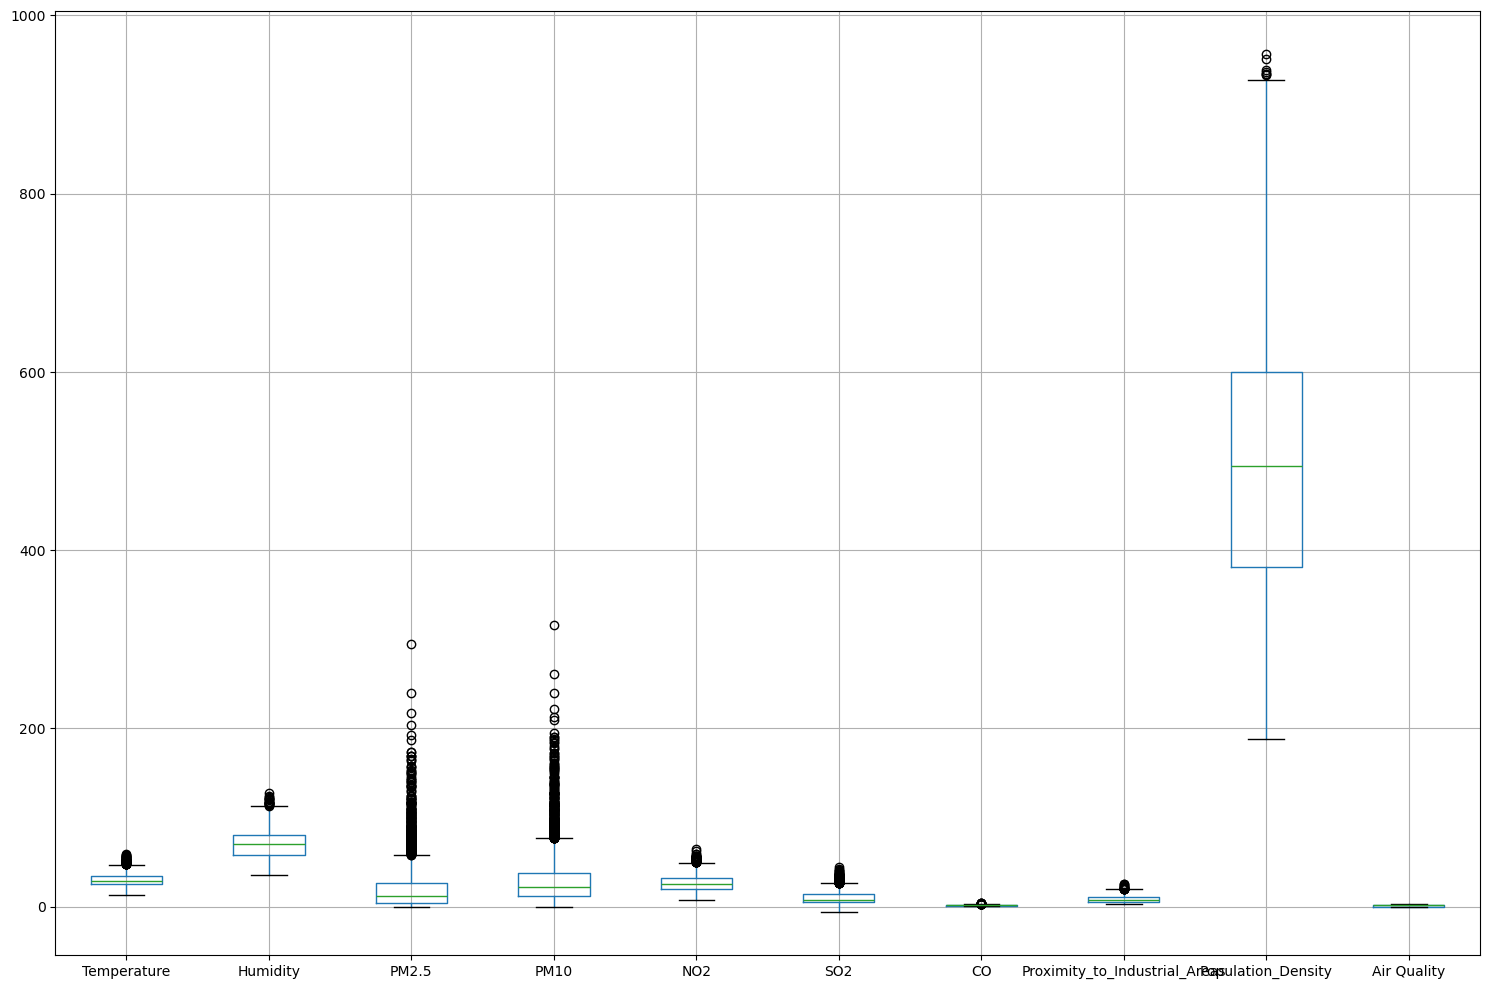

In [21]:
df.boxplot(figsize=(15, 10))
plt.tight_layout()
plt.show()

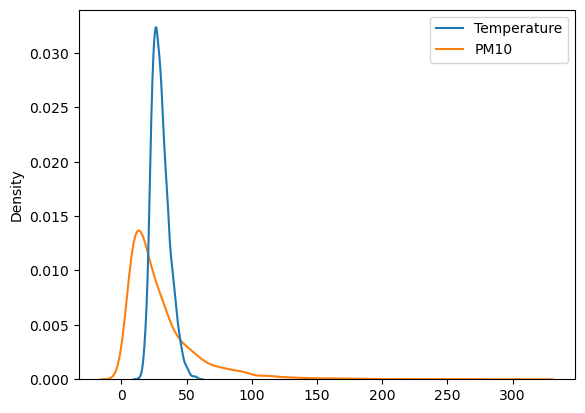

In [24]:
sns.kdeplot(df[["Temperature","PM10"]]);